# Anscombe quartet (n)

In [244]:
# According to the definition given in Wikipedia, Anscombe’s quartet comprises four datasets 
# that have nearly identical simple statistical properties, yet appear very different when graphed. 
# Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician 
# Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect 
# of outliers on statistical properties.

In [245]:
# Proszę przygotować skrypt (plik z rozszerzeniem *.py), który:
# - będzie uruchamiany z konsoli przez np. python nazwa_skryptu.py
# - musi zawierać funkcję main(), sprawdź tutaj
# - zapisze wyniki obliczeń (mean, std, corr, var) w pliku *.csv
# - wygeneruje jeden obraz jpg z 4 wykresami (subploty, 2 kolumny x 2 wiersze)
# - plik jpg oraz csv mają być zapisane do jednego folderu np. "output"

# Kod musi spełniać zasady:
# - PEP8
# - DRY
# - musi zawierać funkcje z docstring oraz type hints
# - musi być sprawdzony przez inną osobę (zatwierdzony code review)

# Proszę wstawić print screen ze swojego repozytorium z kodem oraz tak aby była widoczna nazwa 
# użytkownika (autora)
# Nazwa pliku (bez polskich znaków):
# Nazwisko_Imie_anscombe_niestacj.jpg

<!-- Proszę przygotować skrypt (plik z rozszerzeniem *.py), który:

- będzie uruchamiany z konsoli przez np. python nazwa_skryptu.py

- musi zawierać funkcję main(), sprawdź tutaj

- wygeneruje jeden obraz jpg z 4 wykresami (subploty, 2 kolumny x 2 wiersze)
    - mean, 
    - standard deviation, 
    - correlation coefficient (Pearson),
    - variance

- zapisze wyniki obliczeń w pliku *.csv

- plik jpg oraz csv mają być zapisane do jednego folderu np. "output"


Kod musi spełniać zasady:

- PEP8

- DRY

- musi zawierać funkcje z docstring oraz type hints

- musi być sprawdzony przez inną osobę (zatwierdzony code review)


Proszę wstawić print screen ze swojego repozytorium z kodem oraz tak aby była widoczna nazwa użytkownika (autora)

Nazwa pliku (bez polskich znaków):

Nazwisko_Imie_anscombe_niestacj.jpg -->

In [246]:
import typing
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import os

## data preparation

In [266]:
def makedir():
    resposne = input("Write 'yes, please' and confirm by ENTER to make new dir: output ")
    if resposne == "yes" :
        print("Have a nice new directory")
        os.makedirs('output')
    else:
        print("Making new directory aborted")

In [267]:
makedir()

Write 'yes, please' and confirm by ENTER to make new dir: output  no


Making new directory aborted


In [249]:
def data_as_anscombe(multiindex:bool=False, save:bool=False):
    """ 
    Makes DataFrame from Anscombe quartet's data. Data included.
        Parameters:
            multiindex (bool): Adds multiindex columns to DataFrame. Default = False.
            save (bool): Create csv file with anscombe df.
        Returns:
            anscombe_df (DataFrame)
    """
    x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
    y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
    y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
    y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
    x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
    y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

    list_of_tuples = list(zip(x, y1, x, y2, x, y3, x4, y4))
    cols = ["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]
    
    anscombe_df = pd.DataFrame(list_of_tuples, columns=cols)
    
    if multiindex == True:
        quartet = ["I", "I", "II", "II", "III", "III", "IV", "IV"]
        multi_cols = [np.array(quartet), np.array(cols)]
        
        anscombe_df.columns = multi_cols
    
    if save == True:
        anscombe_df.to_csv("output/anscombe_df.csv", index=False)
    
    return anscombe_df

In [250]:
quartet_df = data_as_anscombe(multiindex=True, save=True)
quartet_df

I         II       III         IV       
    x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

## calculations

In [251]:
def anscombe_statistics(a, b, rounded=2):
    """ """
    var = round(np.var(a), rounded)
    mean = round(np.mean(a), rounded)
    std = round(np.std(a), rounded)
    corr = round(pearsonr(a, b)[0], rounded)
   
    return [var, mean, std, corr]

In [252]:
def set_calculations_in_frame(df, save=False):
    """ """
    set1 = anscombe_statistics(df["I"]["x1"], df["I"]["y1"], rounded=2)
    set2 = anscombe_statistics(df["II"]["x2"], df["II"]["y2"], rounded=2)
    set3 = anscombe_statistics(df["III"]["x3"], df["III"]["y3"], rounded=2)
    set4 = anscombe_statistics(df["IV"]["x4"], df["IV"]["y4"], rounded=2)
    
    columns = ["var", "mean", "std", "corr"]
    index = ["set1", "set2", "set3", "set4"]
    data = [set1, set2, set3, set4]
    df = pd.DataFrame(data, index=index, columns=columns)
    
    if save == True:
        df.to_csv("output/set_calculations_in_frame.csv", index_label="index")
        
    return df

In [253]:
calculated_df = set_calculations_in_frame(quartet_df, save=True)
calculated_df

,var,mean,std,corr
set1,10.0,9.0,3.16,0.82
set2,10.0,9.0,3.16,0.82
set3,10.0,9.0,3.16,0.82
set4,10.0,9.0,3.16,0.82


## visualization

In [254]:
def pandas_plot(df, save=False):
    """ """
    plot = df.plot(kind="bar", figsize=(9, 9), grid=True, legend=True, 
                   title="Simple statistics comparison")
    
    if save == True:
        plt.savefig("output/calc.jpg")
        
    return plot

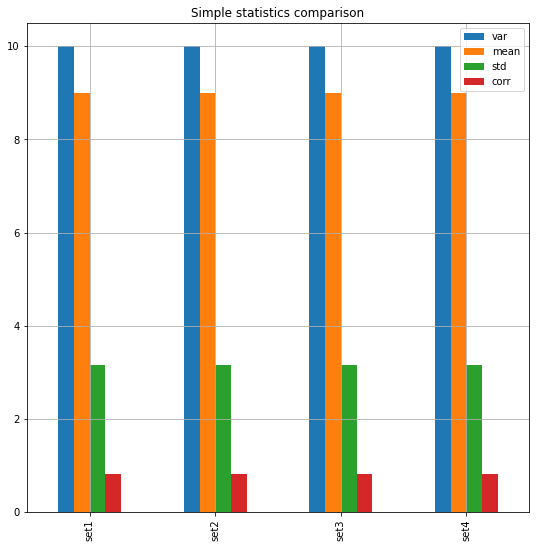

In [255]:
pandas_plot(calculated_df, save=True);

In [256]:
def anscombe_regplot_sets(save=False):
    """ """

    fig, axes = plt.subplots(2,2, figsize = (9, 9), sharex=True, sharey=True)
    sns.regplot(x=quartet_df["I"]["x1"], y=quartet_df["I"]["y1"], ax=axes[0, 0], 
                scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[0, 0].title.set_text("Set I")
    axes[0, 0].grid();

    sns.regplot(x=quartet_df["II"]["x2"], y=quartet_df["II"]["y2"], ax=axes[0, 1],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[0, 1].title.set_text("Set II")
    axes[0, 1].grid();
    
    sns.regplot(x=quartet_df["III"]["x3"], y=quartet_df["III"]["y3"], ax=axes[1, 0],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[1, 0].title.set_text("Set III")
    axes[1, 0].grid();

    sns.regplot(x=quartet_df["IV"]["x4"], y=quartet_df["IV"]["y4"], ax=axes[1, 1],
               scatter_kws={"color": "green"}, line_kws={"color": "red"})
    axes[1, 1].title.set_text("Set IV") 
    axes[1, 1].grid();
    
    axes[0, 0].set(xlim=(2, 20), ylim=(2, 14))
    axes[0, 0].set(xticks=(range(2, 22, 2)), yticks=(range(2, 16, 2)))
    
    if save == True:
        plt.savefig("output/anscombe.jpg")

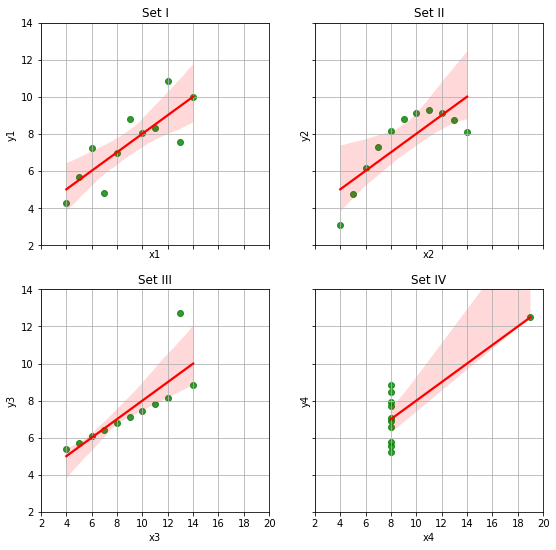

In [257]:
anscombe_regplot_sets(save=True)

## as script .py

In [258]:
# shell command convert .ipynb to .py
#!jupyter nbconvert --to script anscombe_quartet.ipynb

In [259]:
# if __name__ == "__main__":
#     main()

## path saving

In [260]:
import os
directory_path = os.getcwd()
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path)
print("My directory name is : " + folder_name)

My current directory is : C:\Users\DJaskulski\Documents\PycharmProjects\data_prep_classes
My directory name is : data_prep_classes


In [261]:
# os.makedirs('output')

# root = 'output'
# df.to_csv(root + '/' + 'df.csv')